In [1]:
%matplotlib inline
# データを取ってスクレイピングする

import pandas as pd

# 表示するカラムサイズを指定
pd.options.display.max_columns = 60

url = 'http://npb.jp/bis/players/01305137.html'  # 察してください


In [2]:
datasets = pd.io.html.read_html(url)  # データを読む&スクレイピング(たったこれだけ)

In [3]:
# 前処理用の関数を定義します

import numpy as np

def object_2_float64(df, index):
    # 欠損値(多分無いと思うが...)をゼロ埋めしてからのfloat64に変換
    return df[index].fillna(0).astype(np.float64)

In [4]:
# 投手成績を取るよ&ヘッダー行と通算行を削除
pitchs = datasets[3].drop([0, len(datasets)-1])

In [5]:
# 計算可能なデータ型に変換
for index in range(2, 25):
    pitchs[index] = object_2_float64(pitchs, index)


In [6]:
# 中身をチェック
pitchs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
1,2013,北海道日本ハム,13.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000,274.0,61.0,0.2,57.0,4.0,33.0,8.0,46.0,2.0,0.0,30.0,29.0,4.23
2,2014,北海道日本ハム,24.0,11.0,4.0,0.0,0.0,0.0,3.0,2.0,0.0,0.733,639.0,155.0,0.1,125.0,7.0,57.0,4.0,179.0,6.0,1.0,50.0,45.0,2.61
3,2015,北海道日本ハム,22.0,15.0,5.0,0.0,0.0,0.0,5.0,3.0,0.0,0.750,621.0,160.0,0.2,100.0,7.0,46.0,3.0,196.0,9.0,0.0,40.0,40.0,2.24
4,2016,北海道日本ハム,15.0,8.0,4.0,0.0,0.0,0.0,3.0,0.0,1.0,0.667,428.0,108.0,0.2,72.0,4.0,37.0,7.0,132.0,4.0,0.0,26.0,23.0,1.90


In [7]:
# 指標値を計算...の前に投球回が別れて出ちゃってるのでくっつけます
pitchs['IP'] = pitchs[13] + pitchs[14]
pitchs['IP']

1     61.2
2    155.1
3    160.2
4    108.2
Name: IP, dtype: float64

In [8]:
# 試しに計算
pitchs['K/9'] = pitchs[19] * 9 / pitchs['IP']
pitchs['BB/9'] = pitchs[17] * 9 / pitchs['IP']
pitchs['HR/9'] = pitchs[16] * 9 / pitchs['IP']
pitchs['K/BB'] = pitchs[19] / pitchs[17]
pitchs['WHIP'] = (pitchs[15] +  pitchs[17]) / pitchs['IP']
pitchs[[0, 'K/9', 'BB/9', 'HR/9', 'K/BB', 'WHIP']]

,0,K/9,BB/9,HR/9,K/BB,WHIP
1,2013,6.764706,4.852941,0.588235,1.393939,1.470588
2,2014,10.386847,3.307544,0.406190,3.140351,1.173436
3,2015,11.011236,2.584270,0.393258,4.260870,0.911361
4,2016,10.979667,3.077634,0.332717,3.567568,1.007394


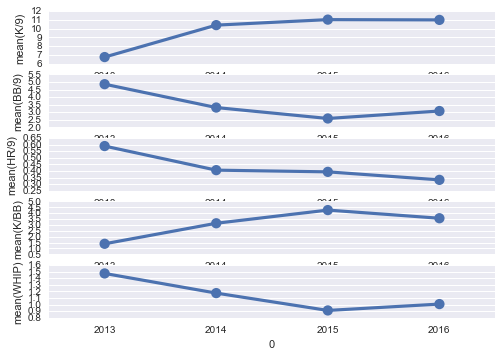

In [9]:
# 年度ごとのグラフにしてみる
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
fig, ax = plt.subplots(5);
sns.pointplot(x=0, y="K/9", data=pitchs, ax=ax[0])
sns.pointplot(x=0, y="BB/9", data=pitchs, ax=ax[1])
sns.pointplot(x=0, y="HR/9", data=pitchs, ax=ax[2])
sns.pointplot(x=0, y="K/BB", data=pitchs, ax=ax[3])
sns.pointplot(x=0, y="WHIP", data=pitchs, ax=ax[4])